# NLP_L4_Seq2seq & Attention_OSM


# 학습 목표

1. 언어 모델이 발전해 온 과정을 개략적으로 파악한다.
2. 기존 RNN 기법이 번역에서 보인 한계를 파악하고, 이를 개선한 Seq2seq를 이해한다.
3. Seq2seq를 발전시킨 Attention에 대해 알아본다.


# 언어모델 발전과정

- 언어 모델(Language Model)이란, 주어진 단어들을 보고 다음 단어를 맞추는 모델입니다. 더 자세하게는, 단어의 시퀀스를 보고 다음 단어에 확률을 할당하는 모델이죠!


# 1) 통계적 언어 모델 (Statistical Languagel Model)

한계: 

```
한 번도 본 적 없는(학습 데이터에 존재하지 않는) 단어 / 문장에 대해서는 확률을 부여할 수 없다.
따라서 언어 모델이 아우르는 범위를 넓히기 위해 다양한 단어를 포함하는 데이터가 필요하다.
```

# 2) 신경망 언어모델 (Neural Network Language Model: NNLM)

- 희소 문제란, 모델이 충분한 데이터를 관측하지 못하면 언어를 정확히 모델링 할 수 없는 문제를 말한다. 한 번도 관측하지 못한 데이터에 대해선 0에 확률을 부여한다는 것에서 문제가 발생한다.
- 룩 업 테이블: 원-핫 인코딩의 입력이 투사층을 거치는 것은 그 행을 그대로 읽어 와서 표현하는 것과 같다는 의미
- 활성함수 Softmax:  소프트맥스 함수를 거쳐 나온 0-1 사이 값은 해당 인덱스에 대한 확률을 의미한다.
- 한계: 예측에 정해진 갯수의 단어만 참고한다.
- 이를 보안하기 위해 순환신경망: RNN이 생겼다.

# 3) RNN

이전 방식: 여러개의 단어를 합쳐서 고정된 크기의  Weight를 선형으로 처리하는 방식 

rnn 방식 = 입력을 순차적으로 받아서 고정된 크기의 Weight가 선언된다. (입력의 크기가 유동적이다)

file:///home/aiffel-dj54/Downloads/Untitled%20(10).png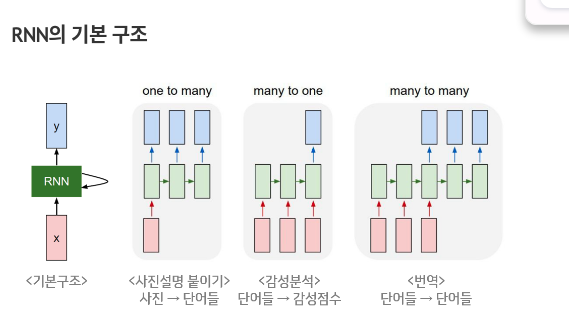

- 현재상황

단어 자체가 의미를 갖는 임베딩 벡터이며 Rnn으로 입력의 유연성도 가짐 

하지만 2가지 문제 발생

1) 첫째로는 하나의 Weight에 입력을 적립하다 보니 입력이 길어질수록 이전 입력에 대한 정보가 소실되는 기울기 소실(Vanishing Gradient) 문제 →  LSTM으로 개선 

2) 둘째로는 단어 단위로 입력과 출력을 순환하는 RNN 구조는 문장 생성엔 적합할지언정 번역에 사용하기는 어렵다는 문제가 있습니다.

한국어와 영어의 경우 어순이 다르기 때문에 순차적으로 입력받으면 말이 안맞음! → 그래서 번역을 할때 문장 전체를 보고 나서 번역하는 구조가 필요함!

이것이 바로 Seq2seq구조!

## 3-1) LSTM

RNN의 기울기 손실 문제를 해결하기 위해 LSTM이 제안되었다. 

LSTM의 최종 목표는 입력 문장에 대한 출력문장의 조건부 확률을 구하는 것이다. 입력 문장이  x일때 출력문장이 y일 확률을 구하는 것!

file:///home/aiffel-dj54/Downloads/Untitled%20(11).png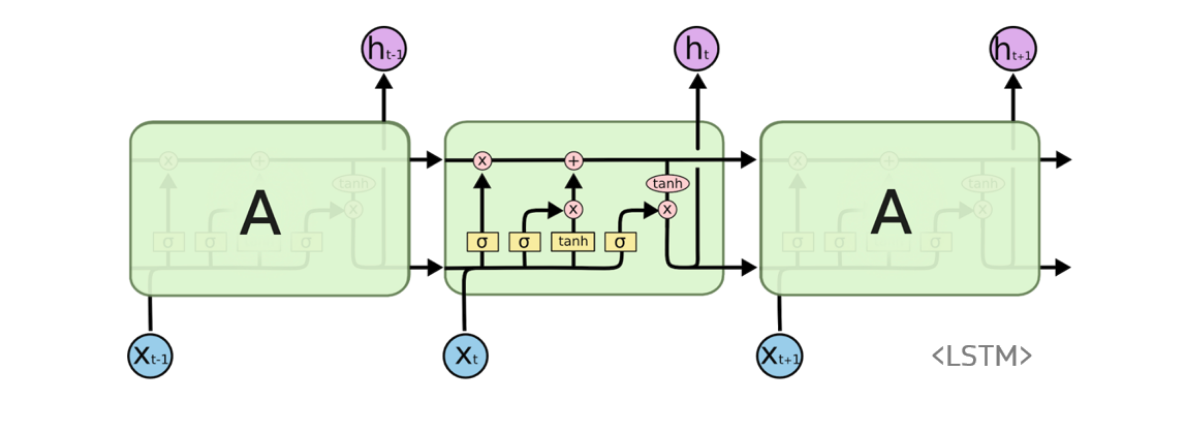


## 3-2) Sequence to Sequence

RNN의 문제는 출력이 바로 이전 입력까지만 나와서 서로 어순이 다른 한글을 영어로 바꿀 경우 문장이 말이 안되게 나옴 그래서 문장 전체를 한번에 받을 수 있는 구조가 필요했다 → seq2seq 모델

- 모델 구조

= 인코더와 디코더를 가지고 있고 인코더에서 모든 단어를 순차적으로 입력받아서 숫자로 바꾸고  마지막에 이 정보를 압축해서 하나의 벡터로 만든다. 이것이 컨텍스트 벡터다. 

이걸 다시 디코더로 전송한다. 디코더는 숫자가 다시 단어가 되도록 바꾸는 역할을 한다.  

file:///home/aiffel-dj54/Downloads/downldoad.png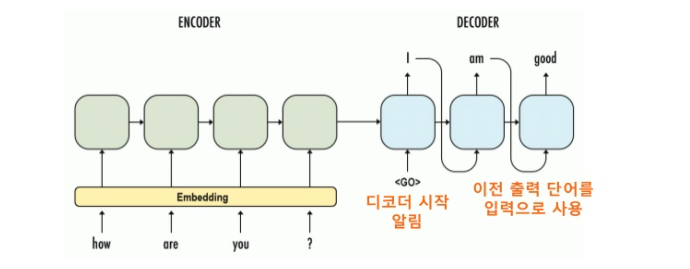

- 인코더와 디코더는 RNN 셀이며 성능을 올리기 위해서 실제로는  lstm or gru셀로 구성한다.
- 인코더에 단어가 들어갈때는 토큰화한 상태에서 입력된다.
- 인코더의 마지막 시점의 은닉상태를 컨텍스트 벡터라고 하며 이걸 디코더에 넘겨준다.
- 컨텍스트 벡터는 디코더의 첫번째 은닉상태로 사용된다.

file:///home/aiffel-dj54/Downloads/Untitled%20(12).png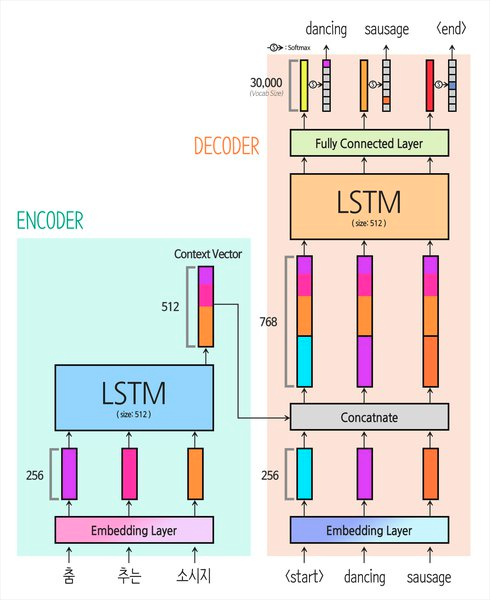

[https://reniew.github.io/35/](https://reniew.github.io/35/)


# 4) Attention!


## 4-1) Bahdanau Attention

Seq2Seq의 한계: 컨텍스트 벡터가 고정된 길이로 정보를 압축해서 손실이 발생한다. 

정보가 길어질수록 성능이 저하된다. 

❗ Attention idea : 인코더에서 최종 정보값을 사용하는 것이 아닌 모든 단계에서 단어정보를 사용해서 벡터를 만들자!

논문:[https://arxiv.org/pdf/1409.0473.pdf](https://arxiv.org/pdf/1409.0473.pdf)

Bahdanau Attention: 원래 기본 어텐션 모델인듯, Decoder의 현재 Hidden State를 구하기 위해 한 스텝 이전의 Hidden State를 활용하는 것

- 용어정리: 임베딩→ 단어를 컴퓨터가 읽을 수 있도록 표현하는 것(숫자의 배열(벡터)
- 아래 블로그 보고 이해하자

[Attn: Illustrated Attention](https://eda-ai-lab.tistory.com/157)


## 4-2) Luong Attention

= Bahdanau의 Score 함수와는 다르게 하나의 Weight만을 사용하는 것이 특징입니다.

어떤 벡터 공간에 매핑해주는 과정이 없기 때문에 Weight의 크기는 단어 Embedding 크기와 동일해야 연산이 가능합니다.


# 5. GNMT (Google Nueral Machine Translation)

특징! 

- 8개의 LSTM *encoder* 와 8 개의 LSTM *docoder* (게다가 **Attention** 모델)
- 학습시 속도를 올리기 위해 low-precision 연산 처리.
- 드문드문 발생하는 단어들도 잘 좀 처리해보자는 의미에서 *wordpiece* 를 사용.
- 빠른 검색을 위한 beam-search 는 local-normalization 기법을 사용함.

#단점

- (1) 느린 학습(training) 속도와 느린 추론(inference) 속도

추론 속도도 보통 phrase-based 방식보다 느린데 이는 모델 파라미터가 너무 많아 단위 연산 비용이 높기 때문.

- (2) 드물게 등장하는 단어에 대한 부정확도

    아주 드물게 등장하는 단어는 추론(inference)시 사전에 없을 수 있다.

- (3) 가끔씩 전체 입력 문장에 대해 다 번역을 하지 않는 경우가 생긴다.

file:///home/aiffel-dj54/Downloads/Untitled%20(13).png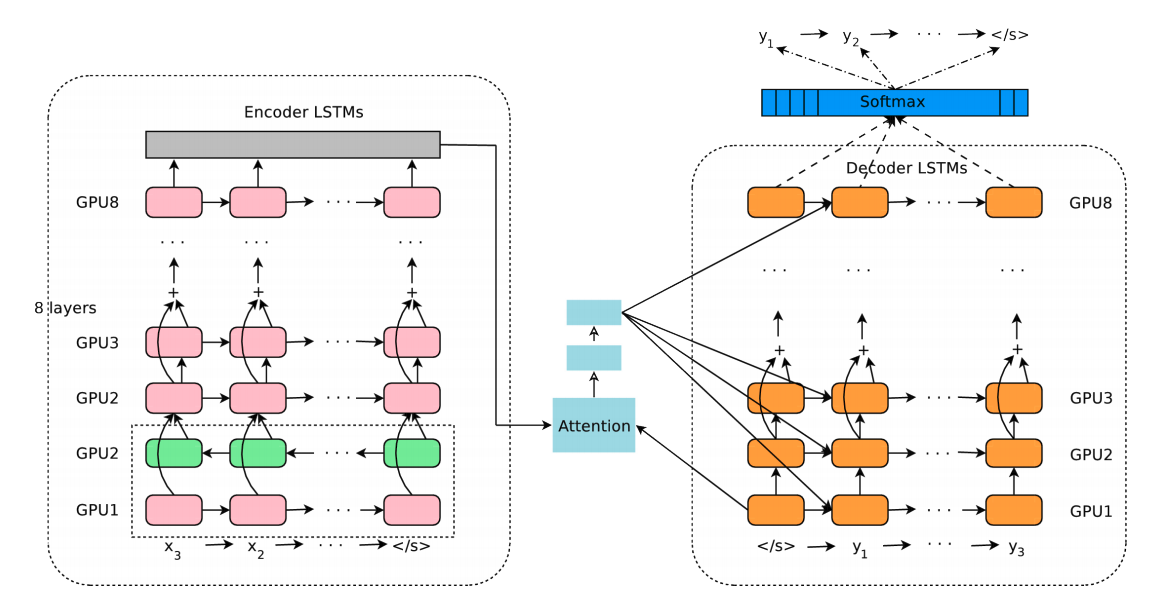


# 6. 트랜스포머

file:///home/aiffel-dj54/Downloads/Untitled%20(14).png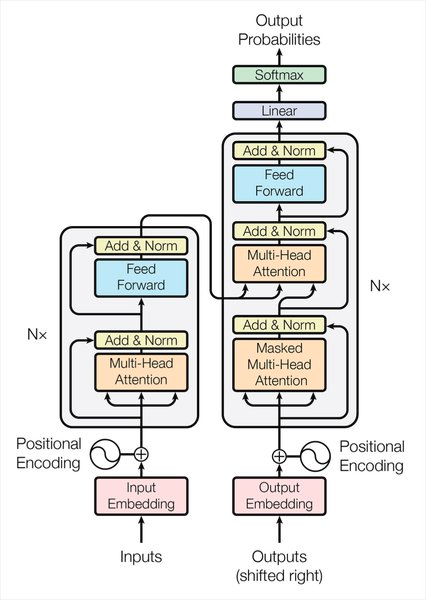